# Basic Machine Learning

Machine Learning Tasks

* Supervised
  * Regression
  * Classification
  * Localization
  * Object Detection
  * Semantic Segmentation
  * Instance Segmentation
* Unsupervised
  * Clustering

![image.png](pic1.png)

## Packages

* Scipy
* Sklearn

---

## Linear Regression 

* what 
  * Fit a line through some points
* why
  * low resolution data points
  * query on the missing parts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 50
rng = np.random.default_rng()
x = rng.random(n)
y = 1.6*x + rng.random(n)

## R-squared

* Goodness of fit
* percentage of the variance in the dependent variable that the independent variables explain collectively

$R^2 = \frac{variance\:explained\:by\:the\:model}{total\:variance}$

R-squared: 0.931656


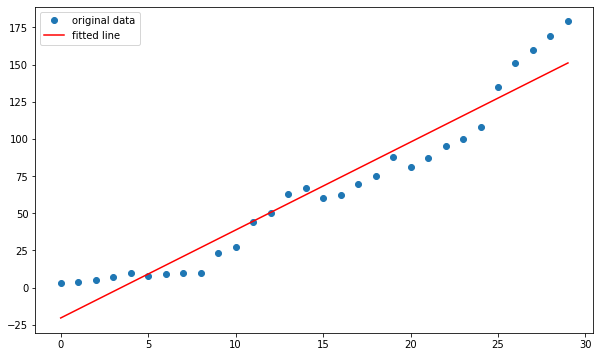

In [5]:
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## Nonlinear Regression

* Nonlinear function between dependent and independent variables
* Polynomial fitting
* polynomial regression is a linear model used for describing non-linear relationships.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

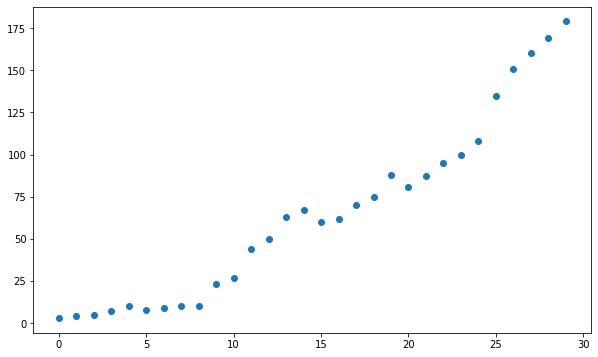

In [4]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [6]:
poly = PolynomialFeatures(degree=9, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

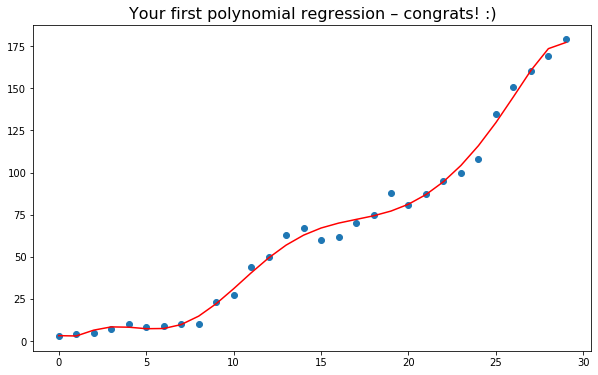

In [7]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

## Example

AZMET air temperature data

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data

,1,11.4,90
0,2,11.5,91.9
1,3,12.2,83.5
2,4,12.4,78.1
3,5,10.2,84.2
4,6,10.5,86.3
5,7,9.6,86.6
6,8,8.8,74.6
7,9,9.0,70.5
8,10,10.1,61.5
9,11,10.8,51.4


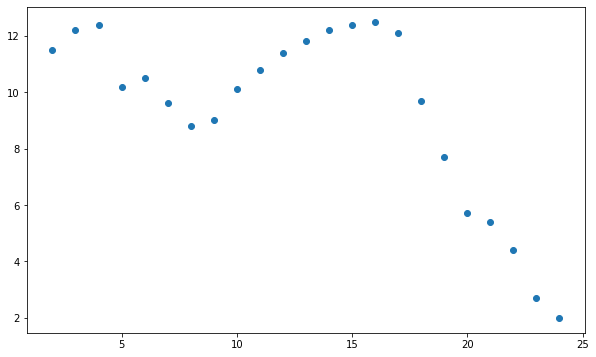

In [9]:
data_parsed = data.to_numpy()

plt.figure(figsize=(10,6))
plt.scatter(data_parsed[:,0], data_parsed[:,1])
plt.show()

[11.64784506]


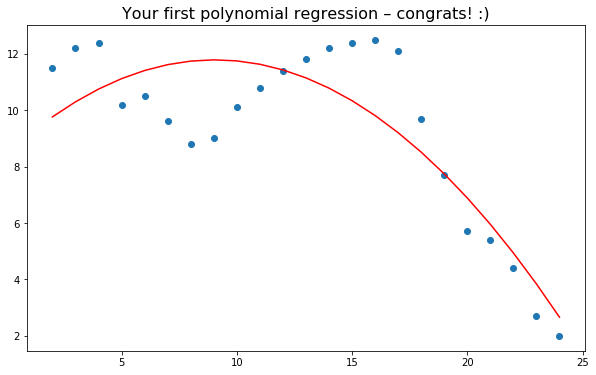

In [11]:
x = data_parsed[:,0]
y = data_parsed[:,1]

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

print(poly_reg_model.predict(poly.fit_transform([[7.2]])))

plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

## Overfitting

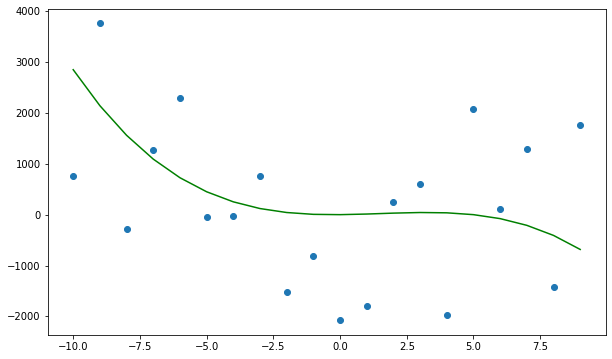

In [12]:
x = np.arange(-10, 10)
y = -2*x**3+9*x**2+5*x

noise_fac = 5000
noise = noise_fac*np.random.random(x.shape[0])-noise_fac/2

y_noisy = y+noise

plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy)
plt.plot(x, y, c="green")
plt.show()

In [15]:
deg = 20

poly = PolynomialFeatures(degree=deg, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_noisy)

y_predicted = poly_reg_model.predict(poly_features)

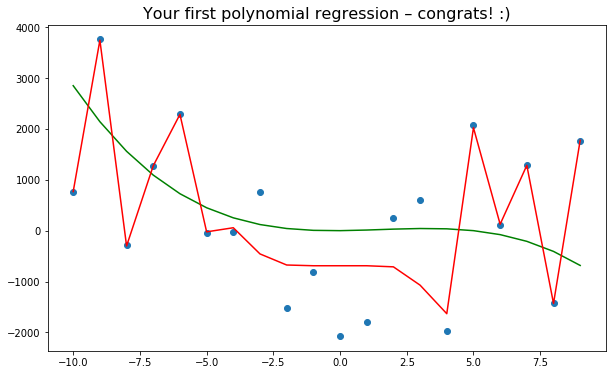

In [16]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y_noisy)
plt.plot(x, y, c="green")
plt.plot(x, y_predicted, c="red")
plt.show()